# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='right')

# Setting the Mouse ID as the index
# df.set_index('Mouse ID', inplace=True)

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [14]:
# Checking the number of mice.
number_of_mice = df['Mouse ID'].nunique()
number_of_mice

249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Identifying duplicates
duplicate_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Getting the Mouse ID of the duplicates
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID.

# Filter the merged data to include all rows corresponding to the duplicate Mouse ID
duplicate_mouse_data = df[df["Mouse ID"].isin(duplicate_mouse_ids)]

# Display the data for the duplicate Mouse ID
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop(df[df["Mouse ID"].isin(duplicate_mouse_ids)].index)

cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [23]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = cleaned_df['Mouse ID'].nunique()

unique_mice_count

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Group data by 'Drug Regimen' and calculate summary statistics using scipy.stats
summary_stats = cleaned_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()

# Calculate additional statistics and add them as new columns to the summary_stats dataframe
summary_stats["Median Tumor Volume"] = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stats["Tumor Volume Variance"] = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(st.tvar)
summary_stats["Tumor Volume Std. Dev."] = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(st.tstd)
summary_stats["Tumor Volume Std. Err."] = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(st.sem)

summary_stats.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'}, inplace=True)

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var=st.tvar,
    std=st.tstd,
    sem=st.sem
)

summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

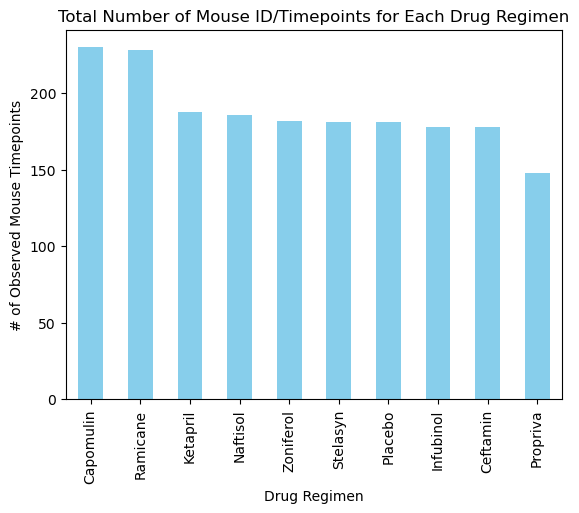

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

# Generate a bar plot using pandas
regimen_counts.plot(kind='bar', title='Total Number of Mouse ID/Timepoints for Each Drug Regimen', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', color='skyblue')

plt.show()

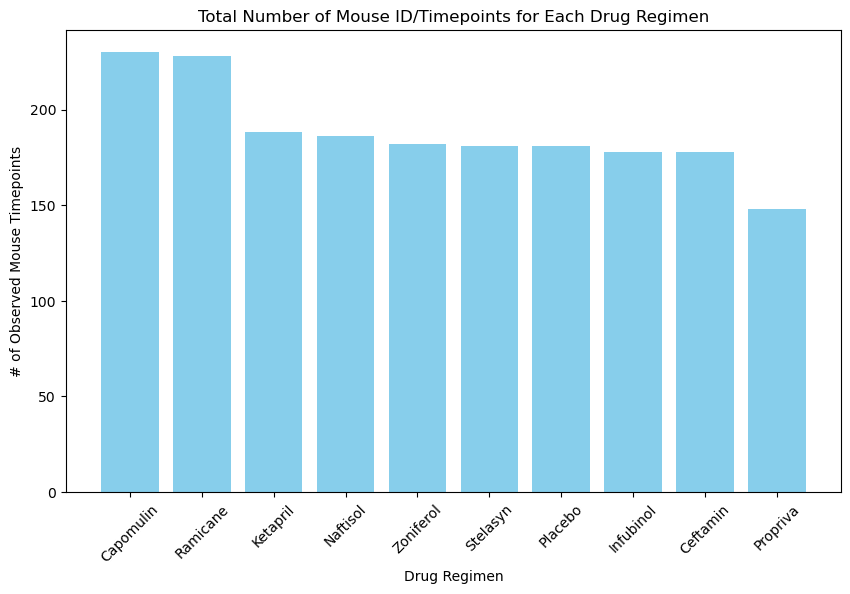

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

# Generate a bar plot using matplotlib's pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

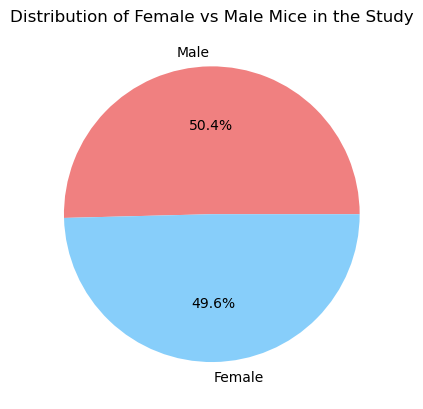

In [48]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = cleaned_df.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice in the Study', colors=['lightcoral', 'lightskyblue'], ylabel='')

plt.show()

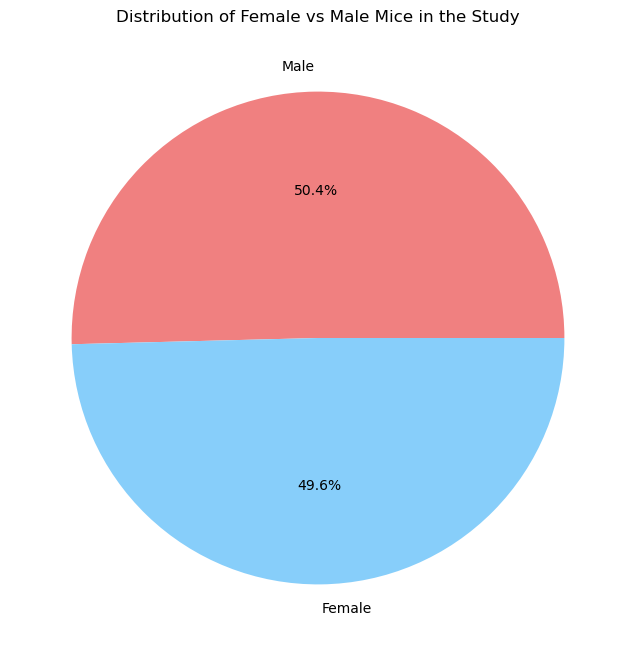

In [51]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = cleaned_df.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Female vs Male Mice in the Study')

plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_data = cleaned_df[cleaned_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=["Mouse ID", "Timepoint"], how="left")

final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in drug_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_tumor_volumes = final_tumor_volume[final_tumor_volume["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]

    # add subset
    tumor_volumes_list.append(regimen_tumor_volumes)

    # Calculate the IQR (Interquartile Range)
    quartiles = regimen_tumor_volumes.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Calculate the bounds to determine potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = regimen_tumor_volumes[(regimen_tumor_volumes < lower_bound) | (regimen_tumor_volumes > upper_bound)]

    # Display the calculated IQR and any outliers found for the current regimen
    print(f"{regimen} Regimen: IQR = {iqr}")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"Potential Outliers: {outliers.tolist()}\n")

Capomulin Regimen: IQR = 7.781863460000004
Lower Bound = 20.70456164999999, Upper Bound = 51.83201549
Potential Outliers: []

Ramicane Regimen: IQR = 9.098536719999998
Lower Bound = 17.912664470000003, Upper Bound = 54.30681135
Potential Outliers: []

Infubinol Regimen: IQR = 11.477135160000003
Lower Bound = 36.83290494999999, Upper Bound = 82.74144559000001
Potential Outliers: [36.3213458]

Ceftamin Regimen: IQR = 15.577752179999997
Lower Bound = 25.355449580000002, Upper Bound = 87.66645829999999
Potential Outliers: []



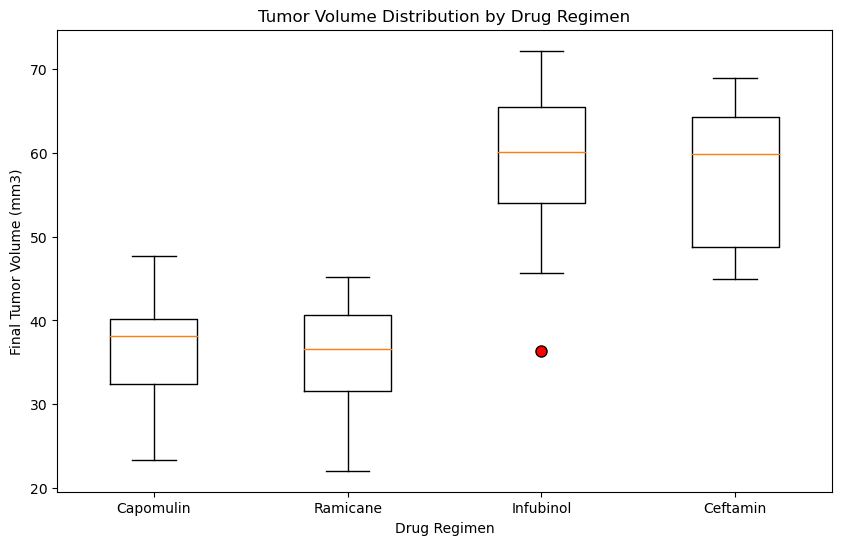

In [56]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes_list, labels=drug_regimens, flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'red'})
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

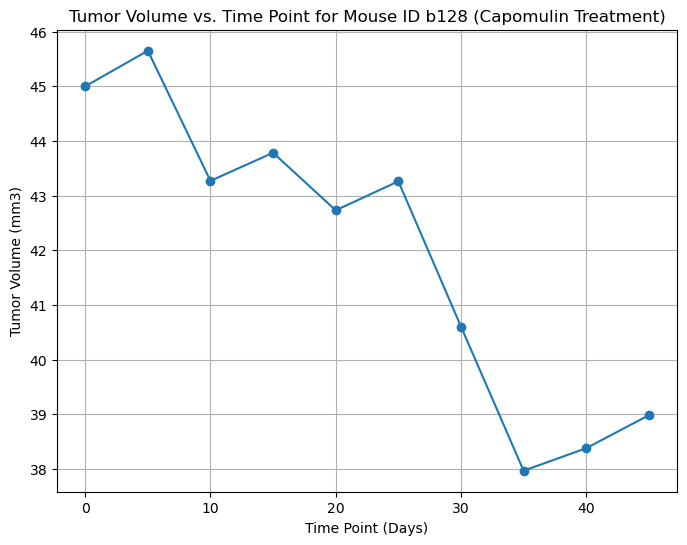

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for a single mouse treated with Capomulin
capomulin_mouse_data = cleaned_df[(cleaned_df["Drug Regimen"] == "Capomulin") & 
                                              (cleaned_df["Mouse ID"] == "b128")]

# Generate a line plot for tumor volume vs time point for the selected mouse
plt.figure(figsize=(8, 6))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title('Tumor Volume vs. Time Point for Mouse ID b128 (Capomulin Treatment)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

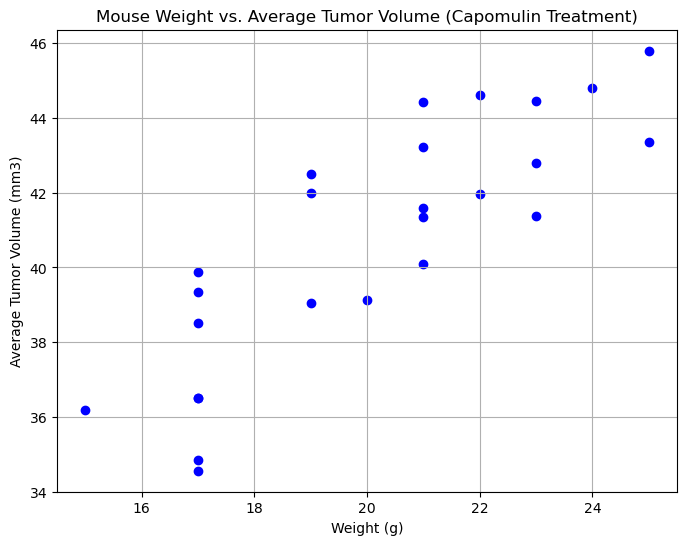

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge the average tumor volume with mouse weight information
capomulin_weight_tumor = pd.merge(average_tumor_volume, capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates(), on="Mouse ID")

# Generate a scatter plot of mouse weight vs the average observed tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_weight_tumor["Weight (g)"], capomulin_weight_tumor["Tumor Volume (mm3)"], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

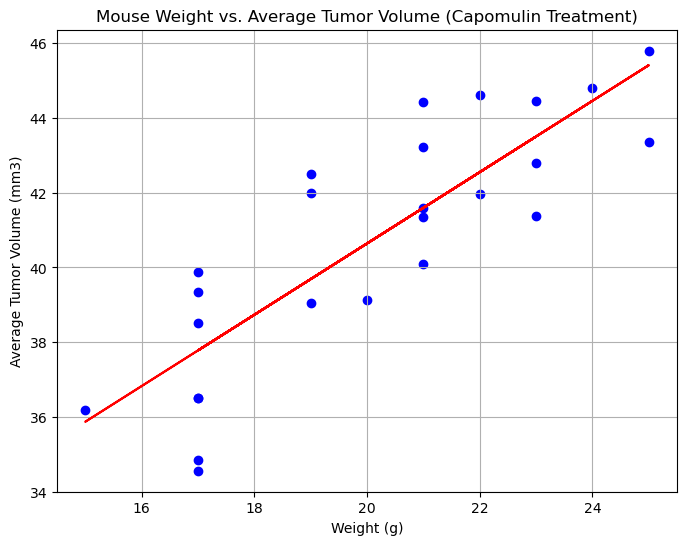

In [63]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_weight_tumor["Weight (g)"], capomulin_weight_tumor["Tumor Volume (mm3)"])[0]

# Perform a linear regression model on the relationship between mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weight_tumor["Weight (g)"], capomulin_weight_tumor["Tumor Volume (mm3)"])

# Generate the linear regression line values
regression_line = slope * capomulin_weight_tumor["Weight (g)"] + intercept

# Display the correlation coefficient and linear regression parameters
correlation, slope, intercept

# Plot the scatter plot and add the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_weight_tumor["Weight (g)"], capomulin_weight_tumor["Tumor Volume (mm3)"], color='blue')
plt.plot(capomulin_weight_tumor["Weight (g)"], regression_line, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()